In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
# Кодирование последовательностей целых чисел в бинарную матрицу
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Выделим из обучающей выборки валидационную для контроля обучения
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Уменьшение размера сети

## Исходная модель

In [5]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [8]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 5s 10ms/step - loss: 0.3801 - accuracy: 0.8431 - val_loss: 0.2805 - val_accuracy: 0.8864
Epoch 2/20
235/235 [==============================] - 2s 6ms/step - loss: 0.1815 - accuracy: 0.9360 - val_loss: 0.2989 - val_accuracy: 0.8835
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1077 - accuracy: 0.9647 - val_loss: 0.3806 - val_accuracy: 0.8737
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0612 - accuracy: 0.9817 - val_loss: 0.4231 - val_accuracy: 0.8765
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9933 - val_loss: 0.5259 - val_accuracy: 0.8679
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0126 - accuracy: 0.9982 - val_loss: 0.5851 - val_accuracy: 0.8689
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.9999 - val_loss: 0.6564 - val_accuracy: 0.8696
Epoch

In [13]:
history_dict_1 = history.history
history_dict_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Меньшая модель

In [14]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
optimizer = optimizers.Adam(learning_rate=0.001)

In [15]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.4429 - accuracy: 0.8285 - val_loss: 0.3074 - val_accuracy: 0.8851
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2275 - accuracy: 0.9205 - val_loss: 0.2726 - val_accuracy: 0.8920
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1597 - accuracy: 0.9460 - val_loss: 0.2818 - val_accuracy: 0.8876
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1168 - accuracy: 0.9633 - val_loss: 0.3046 - val_accuracy: 0.8857
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0858 - accuracy: 0.9763 - val_loss: 0.3398 - val_accuracy: 0.8828
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0630 - accuracy: 0.9847 - val_loss: 0.3780 - val_accuracy: 0.8781
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0455 - accuracy: 0.9908 - val_loss: 0.4257 - val_accuracy: 0.8747
Epoch 

In [17]:
history_dict_less = history.history

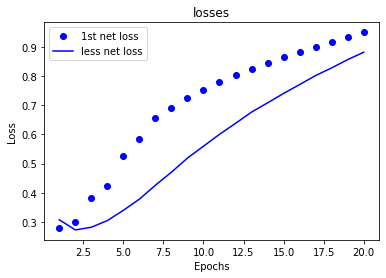

In [19]:
import matplotlib.pyplot as plt

loss_1 = history_dict_1['val_loss']
loss_less = history_dict_less['val_loss']

epochs = range(1, len(loss_1) +1)

plt.plot(epochs, loss_1, 'bo', label='1st net loss')
plt.plot(epochs, loss_less, 'b', label='less net loss')
plt.title('losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Большая сеть

In [20]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
optimizer = optimizers.Adam(learning_rate=0.001)

In [21]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3347 - accuracy: 0.8567 - val_loss: 0.2839 - val_accuracy: 0.8865
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1123 - accuracy: 0.9583 - val_loss: 0.3493 - val_accuracy: 0.8752
Epoch 3/20
235/235 [==============================] - 2s 11ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.5554 - val_accuracy: 0.8697
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0092 - accuracy: 0.9966 - val_loss: 0.8364 - val_accuracy: 0.8639
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.6772 - val_accuracy: 0.8677
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0116 - accuracy: 0.9955 - val_loss: 0.7987 - val_accuracy: 0.8659
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.6746 - val_accuracy: 0.8670

In [23]:
history_dict_big = history.history

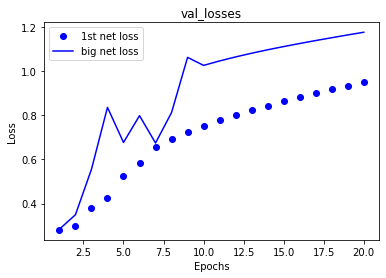

In [25]:
import matplotlib.pyplot as plt

loss_1 = history_dict_1['val_loss']
loss_big = history_dict_big['val_loss']

epochs = range(1, len(loss_1) +1)

plt.plot(epochs, loss_1, 'bo', label='1st net loss')
plt.plot(epochs, loss_big, 'b', label='big net loss')
plt.title('val_losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

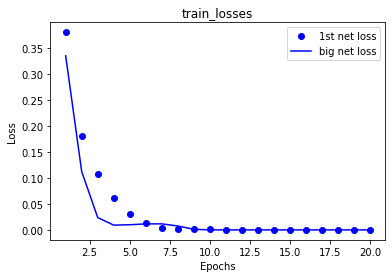

In [26]:
import matplotlib.pyplot as plt

loss_1 = history_dict_1['loss']
loss_big = history_dict_big['loss']

epochs = range(1, len(loss_1) +1)

plt.plot(epochs, loss_1, 'bo', label='1st net loss')
plt.plot(epochs, loss_big, 'b', label='big net loss')
plt.title('train_losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Добавление регуляризации весов

## L2

In [27]:
from keras import regularizers


model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [29]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 8ms/step - loss: 0.4020 - accuracy: 0.8500 - val_loss: 0.3421 - val_accuracy: 0.8806
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2495 - accuracy: 0.9287 - val_loss: 0.3629 - val_accuracy: 0.8778
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2158 - accuracy: 0.9451 - val_loss: 0.4216 - val_accuracy: 0.8646
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1967 - accuracy: 0.9550 - val_loss: 0.4505 - val_accuracy: 0.8676
Epoch 5/20
235/235 [==============================] - 2s 6ms/step - loss: 0.1874 - accuracy: 0.9605 - val_loss: 0.4742 - val_accuracy: 0.8615
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1830 - accuracy: 0.9632 - val_loss: 0.5019 - val_accuracy: 0.8669
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1693 - accuracy: 0.9692 - val_loss: 0.5356 - val_accuracy: 0.8653
Epoch 

In [31]:
history_dict_L2 = history.history

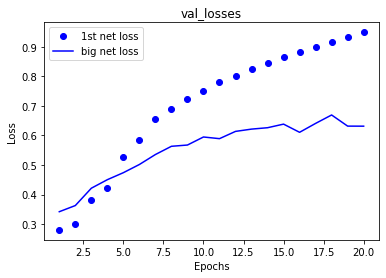

In [32]:
import matplotlib.pyplot as plt

loss_1 = history_dict_1['val_loss']
loss_L2 = history_dict_L2['val_loss']

epochs = range(1, len(loss_1) +1)

plt.plot(epochs, loss_1, 'bo', label='1st net loss')
plt.plot(epochs, loss_L2, 'b', label='big net loss')
plt.title('val_losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## L1

In [33]:

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [35]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.7554 - accuracy: 0.8249 - val_loss: 0.5925 - val_accuracy: 0.8616
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.5794 - accuracy: 0.8700 - val_loss: 0.5851 - val_accuracy: 0.8689
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.5694 - accuracy: 0.8739 - val_loss: 0.5779 - val_accuracy: 0.8722
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.5541 - accuracy: 0.8790 - val_loss: 0.5669 - val_accuracy: 0.8721
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.5329 - accuracy: 0.8877 - val_loss: 0.5542 - val_accuracy: 0.8777
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.5150 - accuracy: 0.8919 - val_loss: 0.5403 - val_accuracy: 0.8776
Epoch 7/20
235/235 [==============================] - 2s 6ms/step - loss: 0.5001 - accuracy: 0.8956 - val_loss: 0.5494 - val_accuracy: 0.8709
Epoch 

In [37]:
history_dict_L1 = history.history

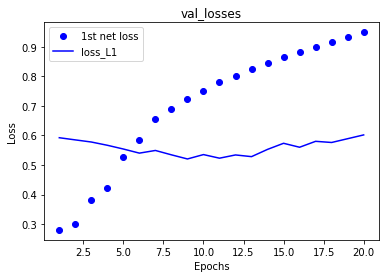

In [38]:
import matplotlib.pyplot as plt

loss_1 = history_dict_1['val_loss']
loss_L1 = history_dict_L1['val_loss']

epochs = range(1, len(loss_1) +1)

plt.plot(epochs, loss_1, 'bo', label='1st net loss')
plt.plot(epochs, loss_L1, 'b', label='loss_L1')
plt.title('val_losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## L1_L2

In [39]:

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(0.001),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [41]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.8763 - accuracy: 0.7799 - val_loss: 0.6670 - val_accuracy: 0.8500
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.6376 - accuracy: 0.8556 - val_loss: 0.6181 - val_accuracy: 0.8608
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.6063 - accuracy: 0.8640 - val_loss: 0.5951 - val_accuracy: 0.8661
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.5753 - accuracy: 0.8713 - val_loss: 0.5703 - val_accuracy: 0.8740
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.5551 - accuracy: 0.8739 - val_loss: 0.5560 - val_accuracy: 0.8716
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.5238 - accuracy: 0.8833 - val_loss: 0.5383 - val_accuracy: 0.8753
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.5102 - accuracy: 0.8857 - val_loss: 0.5354 - val_accuracy: 0.8731
Epoch 

In [43]:
history_dict_L1_L2 = history.history

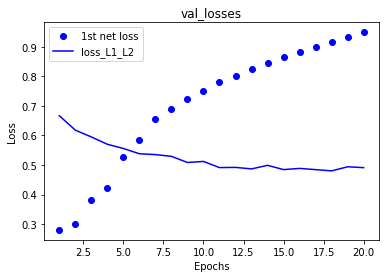

In [44]:
import matplotlib.pyplot as plt

loss_1 = history_dict_1['val_loss']
loss_L1_L2 = history_dict_L1_L2['val_loss']

epochs = range(1, len(loss_1) +1)

plt.plot(epochs, loss_1, 'bo', label='1st net loss')
plt.plot(epochs, loss_L1_L2, 'b', label='loss_L1_L2')
plt.title('val_losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Добавление прореживания

In [45]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [47]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.5816 - accuracy: 0.6761 - val_loss: 0.3550 - val_accuracy: 0.8741
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.3670 - accuracy: 0.8503 - val_loss: 0.2842 - val_accuracy: 0.8844
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2797 - accuracy: 0.8934 - val_loss: 0.2795 - val_accuracy: 0.8866
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2257 - accuracy: 0.9180 - val_loss: 0.3017 - val_accuracy: 0.8858
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1883 - accuracy: 0.9310 - val_loss: 0.3239 - val_accuracy: 0.8837
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1654 - accuracy: 0.9380 - val_loss: 0.3363 - val_accuracy: 0.8854
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1471 - accuracy: 0.9429 - val_loss: 0.3781 - val_accuracy: 0.8838
Epoch 

In [49]:
history_dict_Dropout = history.history

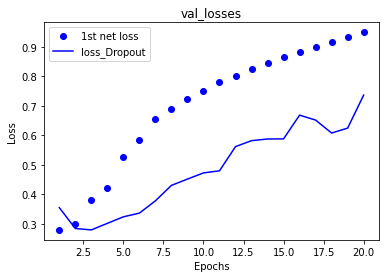

In [50]:
import matplotlib.pyplot as plt

loss_1 = history_dict_1['val_loss']
loss_Dropout = history_dict_Dropout['val_loss']

epochs = range(1, len(loss_1) +1)

plt.plot(epochs, loss_1, 'bo', label='1st net loss')
plt.plot(epochs, loss_Dropout, 'b', label='loss_Dropout')
plt.title('val_losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

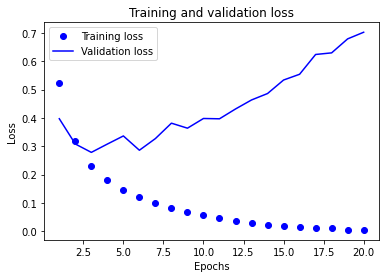

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_1 = history_dict_1['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()